In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anindapauljoy","key":"131339ab7bf46c6173bdceb1143db207"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d lainguyn123/student-performance-factors/

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/versions/
License(s): CC0-1.0
student-performance-factors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
with zipfile.ZipFile('/content/student-performance-factors.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [10]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [ ]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.isnull().any(axis=1)]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


In [ ]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [ ]:
df.isnull().sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
average_student = df['Exam_Score'].mean()
average_student

67.23565914938702

In [ ]:
above_average = df[df['Exam_Score'] > 67.23]
above_average.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69


In [ ]:
df['Parental_Involvement'].value_counts()

,count
Parental_Involvement,
Medium,3362
High,1908
Low,1337


In [ ]:
df['Access_to_Resources'].value_counts()

,count
Access_to_Resources,
Medium,3319
High,1975
Low,1313


In [ ]:
df['Extracurricular_Activities'].value_counts()

,count
Extracurricular_Activities,
Yes,3938
No,2669


In [ ]:
df['Motivation_Level'].value_counts()

,count
Motivation_Level,
Medium,3351
Low,1937
High,1319


In [ ]:
df['Internet_Access'].value_counts()

,count
Internet_Access,
Yes,6108
No,499


In [ ]:
df['Family_Income'].value_counts()

,count
Family_Income,
Low,2672
Medium,2666
High,1269


In [ ]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,4003
High,1947
Low,657


In [ ]:
df['School_Type'].value_counts()

,count
School_Type,
Public,4598
Private,2009


In [ ]:
df['Peer_Influence'].value_counts()

,count
Peer_Influence,
Positive,2638
Neutral,2592
Negative,1377


In [ ]:
df['Learning_Disabilities'].value_counts()

,count
Learning_Disabilities,
No,5912
Yes,695


In [ ]:
df['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,3313
College,1989
Postgraduate,1305


In [ ]:
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3951
Moderate,1998
Far,658


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3814
Female,2793


In [ ]:
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})
df['Family_Income'] = df['Family_Income'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 1, 'Medium': 2 , 'High' :3})
df['School_Type'] = df['School_Type'].map({'Public': 1, 'Private': 2})
df['Peer_Influence'] = df['Peer_Influence'].map({'Positive': 1, 'Neutral': 2, 'Negative' : 3})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
df['Parental_Education_Level'] = df['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate' : 3})
df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 1, 'Moderate': 2 , 'Far' :3})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})


In [ ]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,3,4,0,2,2,2,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,2,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,3,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,2,4,0,2,1,2,70


array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Parental_Involvement'}>,
        <Axes: title={'center': 'Access_to_Resources'}>],
       [<Axes: title={'center': 'Extracurricular_Activities'}>,
        <Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Motivation_Level'}>],
       [<Axes: title={'center': 'Internet_Access'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Family_Income'}>,
        <Axes: title={'center': 'Teacher_Quality'}>],
       [<Axes: title={'center': 'School_Type'}>,
        <Axes: title={'center': 'Peer_Influence'}>,
        <Axes: title={'center': 'Physical_Activity'}>,
        <Axes: title={'center': 'Learning_Disabilities'}>],
       [<Axes: title={'center': 'Parental_Education_Level'}>,
        <Axes: title={'center': 'Distance_from_Home'}>,
        <Axes: ti

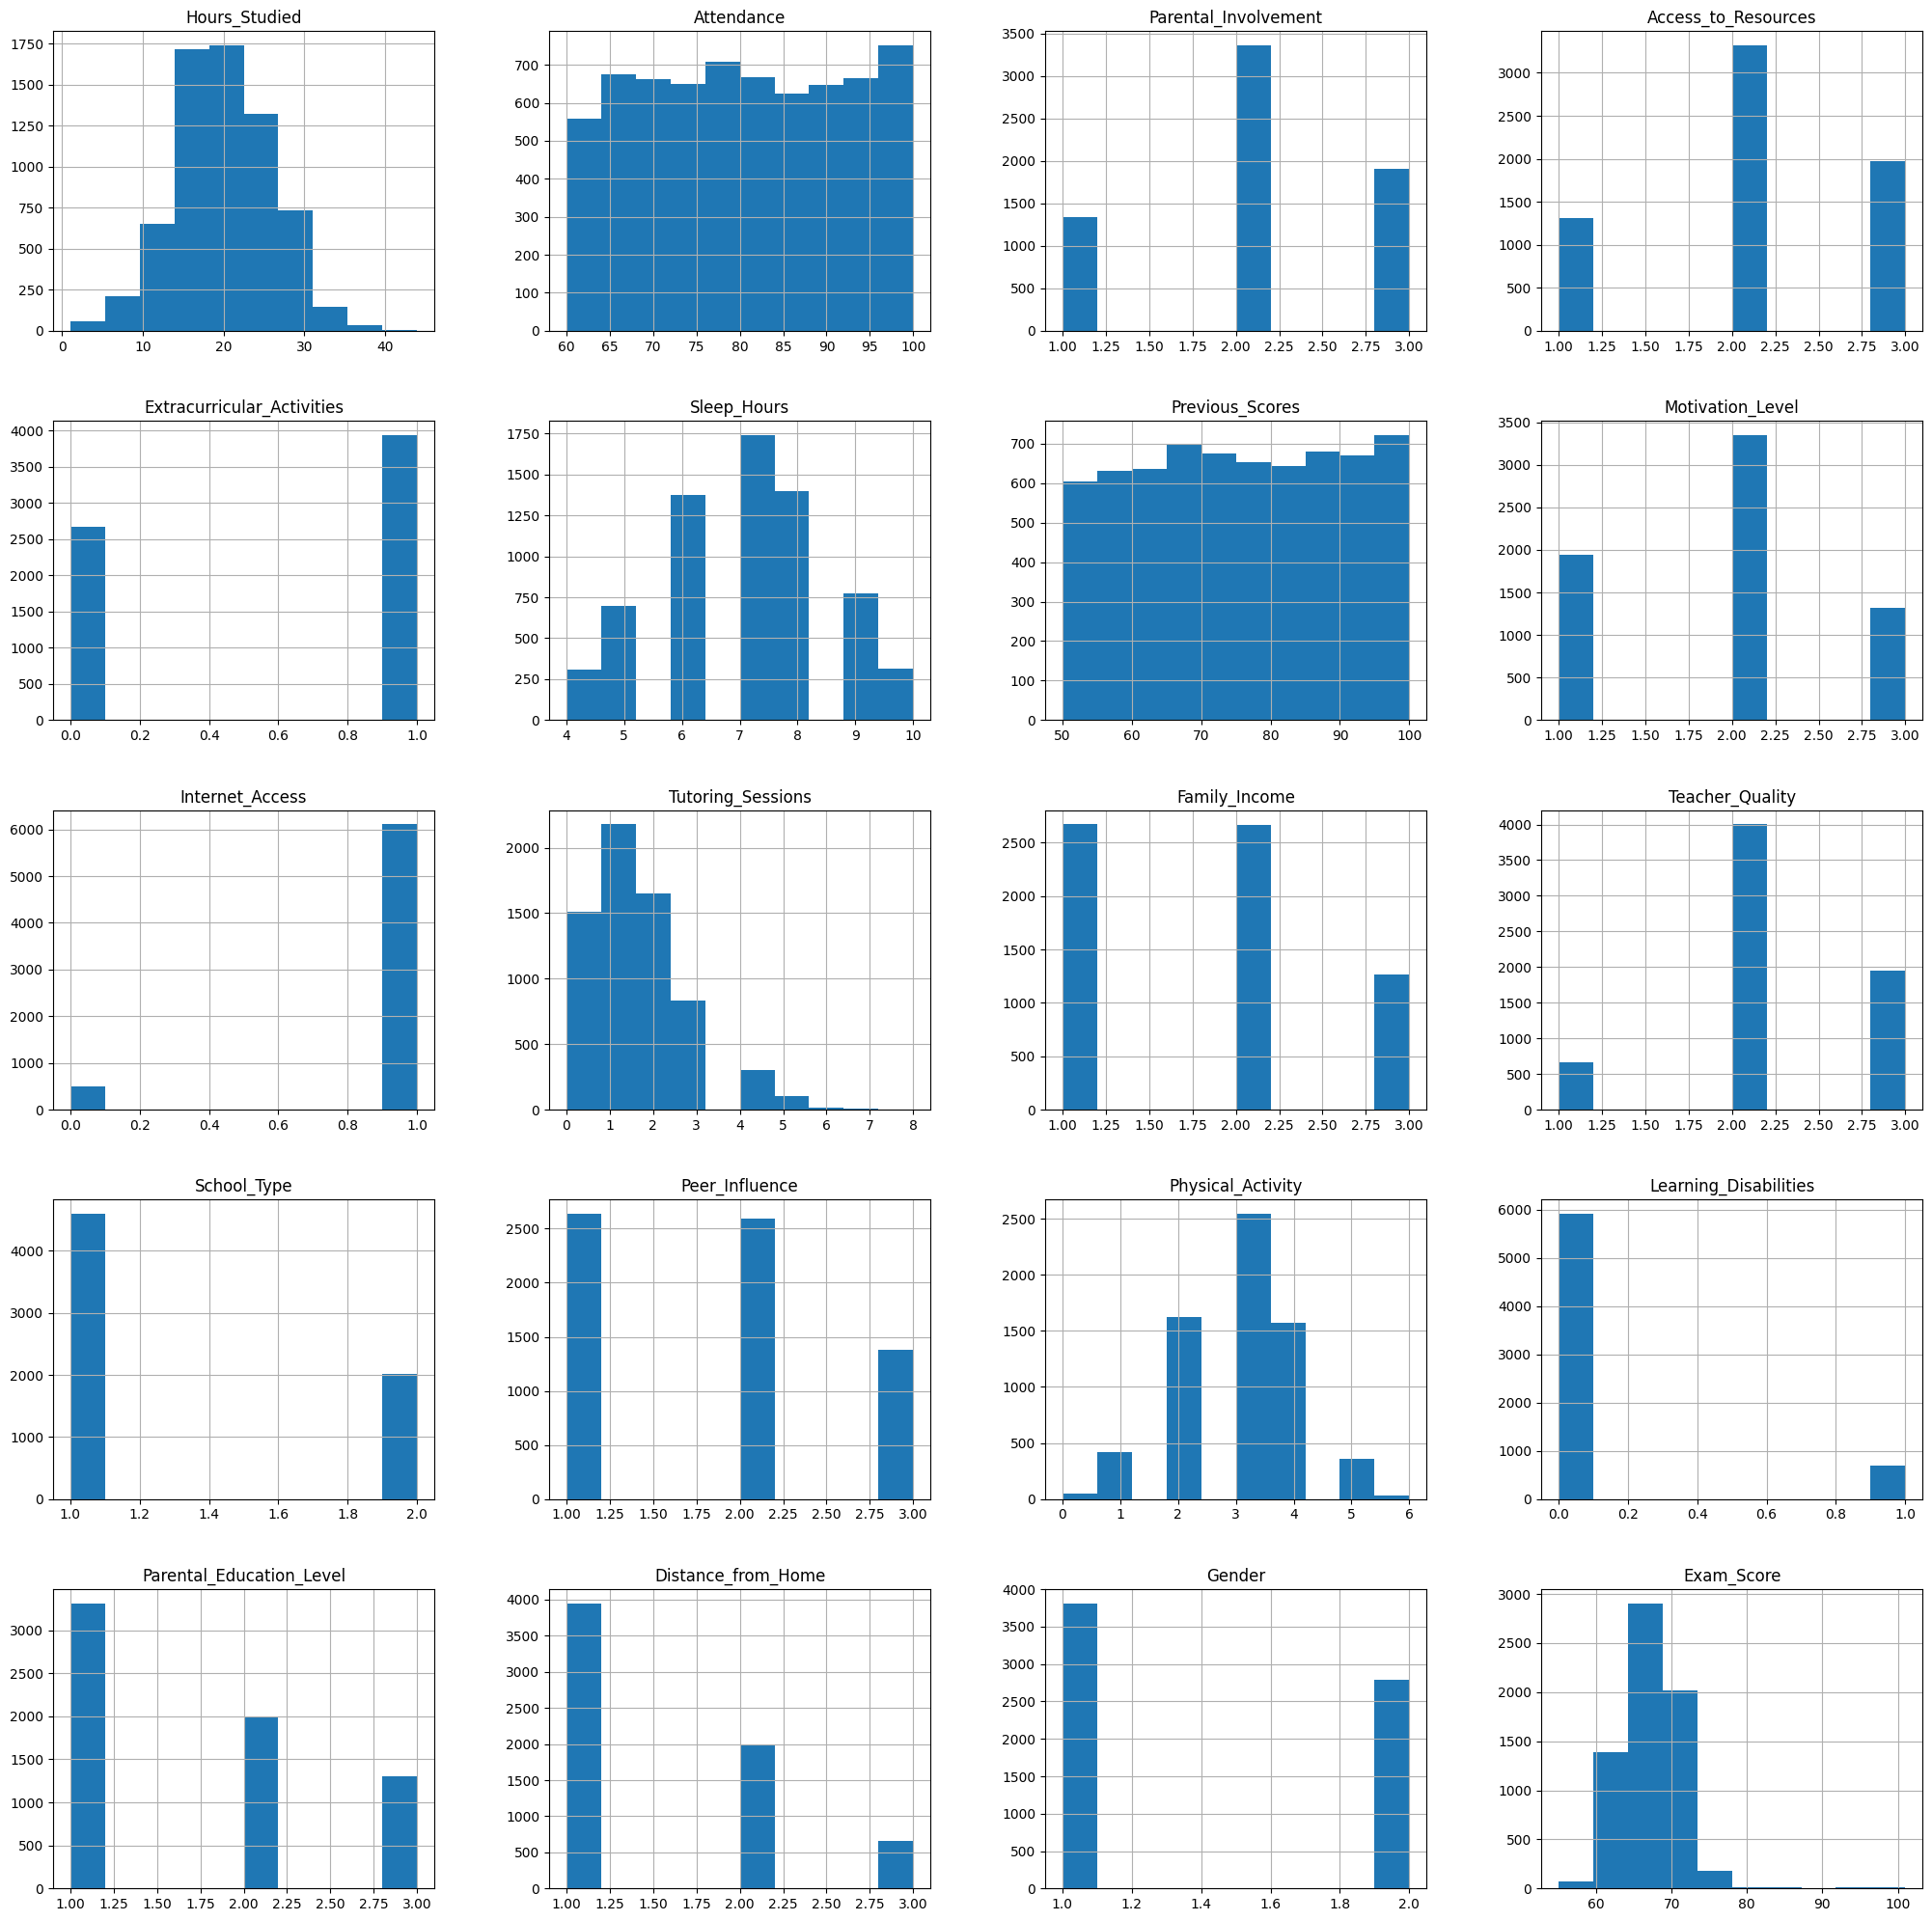

In [ ]:
df.hist(figsize=(25,25))

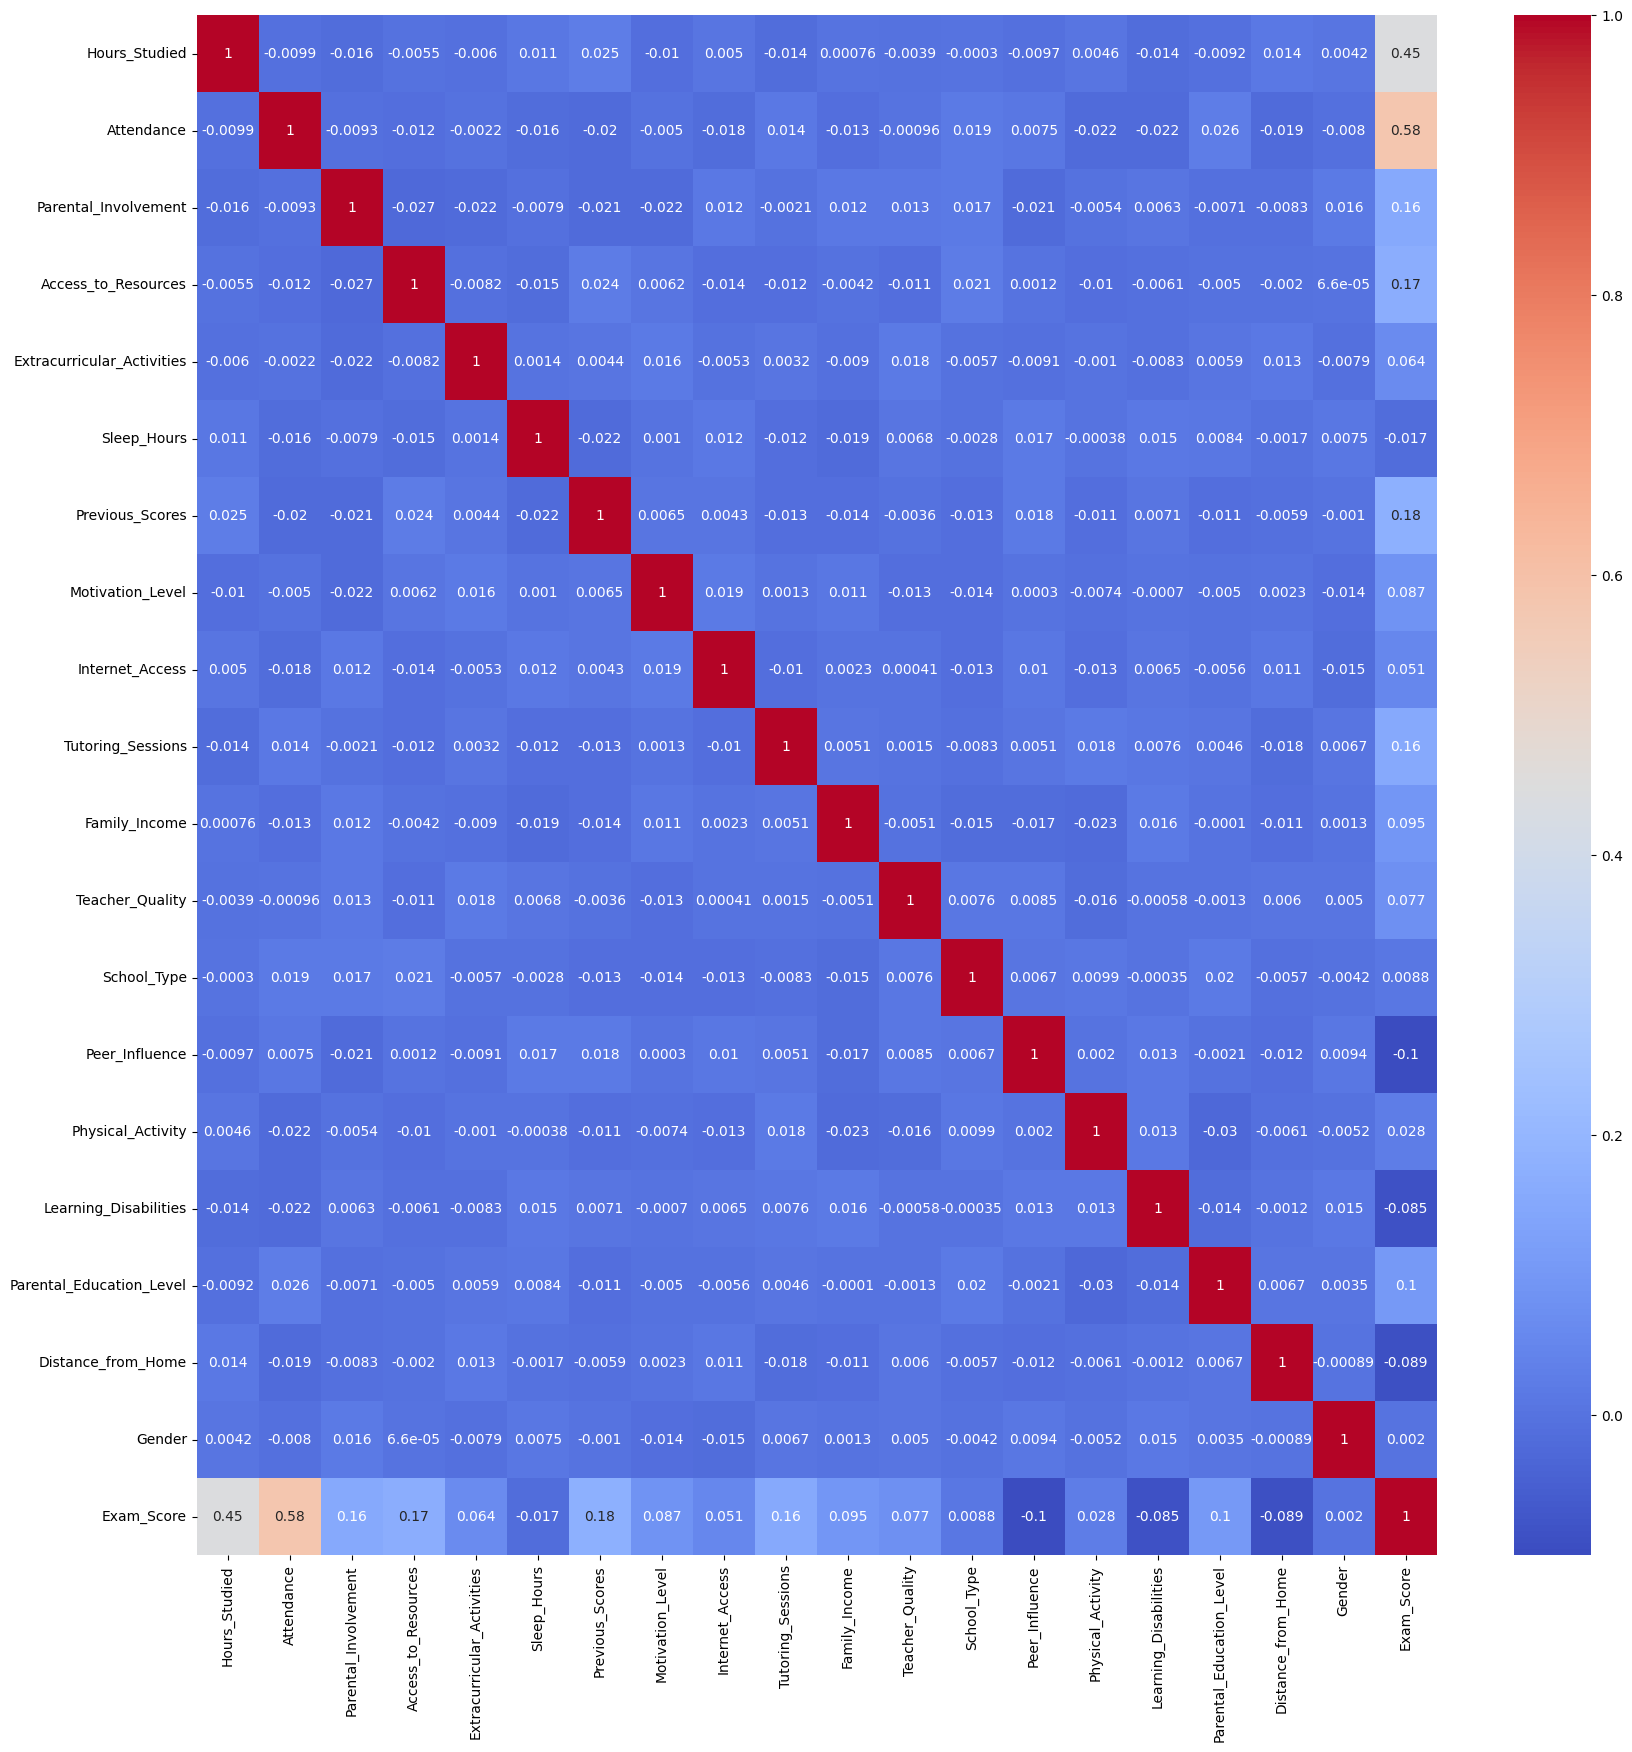

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),cmap='coolwarm', annot=True)
plt.show()

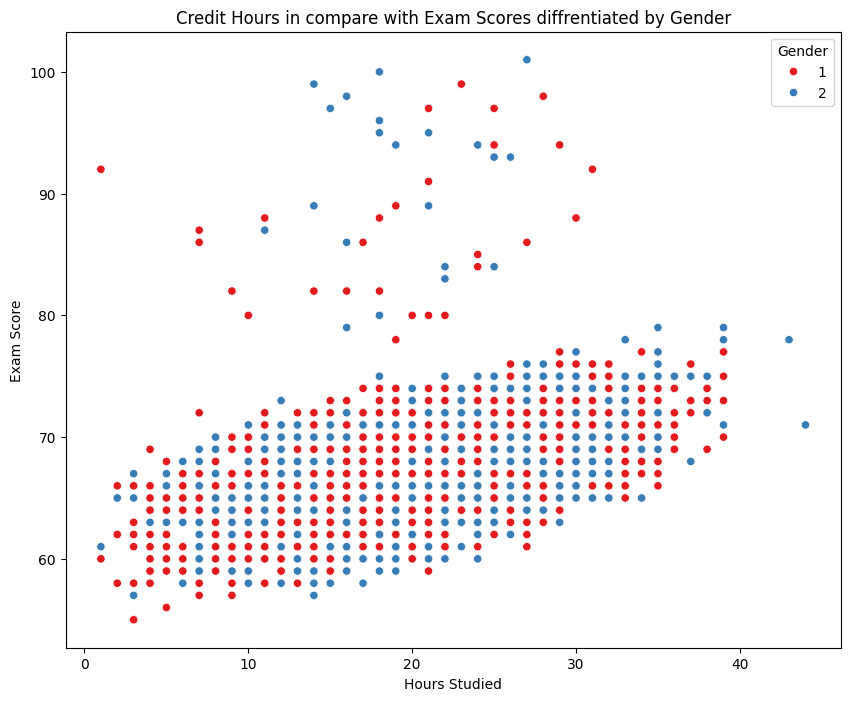

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Hours_Studied',y='Exam_Score',hue='Gender',palette='Set1')
plt.title('Credit Hours in compare with Exam Scores diffrentiated by Gender')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

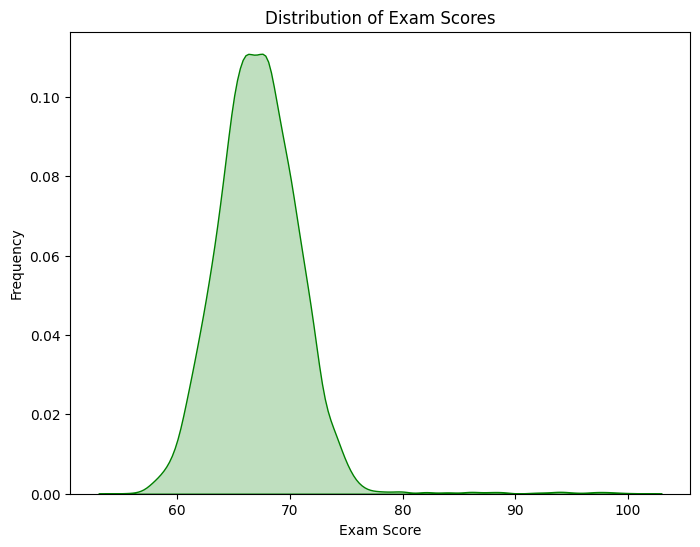

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data = df, color = 'Green', x='Exam_Score', fill='True')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

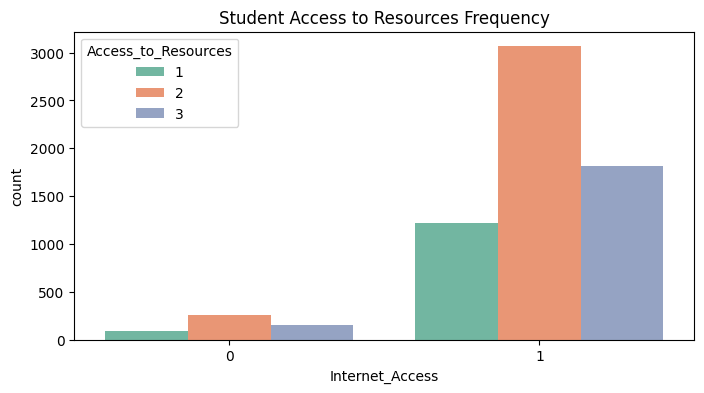

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Internet_Access'], hue=df['Access_to_Resources'], palette='Set2')
plt.title('Student Access to Resources Frequency')
plt.show()

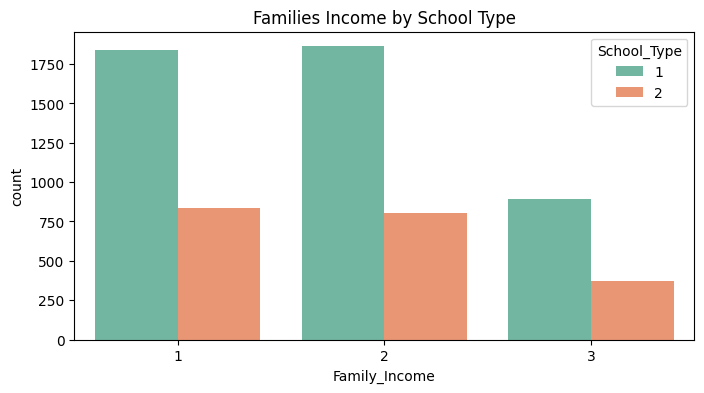

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'], hue=df['School_Type'], palette='Set2')
plt.title('Families Income by School Type')
plt.show()

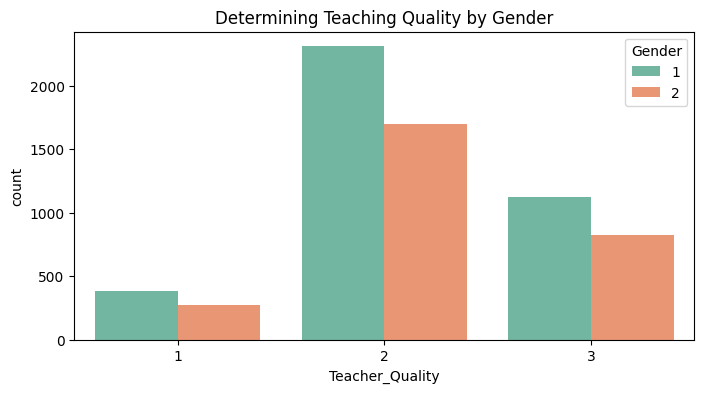

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Teacher_Quality'], hue=df['Gender'], palette='Set2')
plt.title('Determining Teaching Quality by Gender')
plt.show()

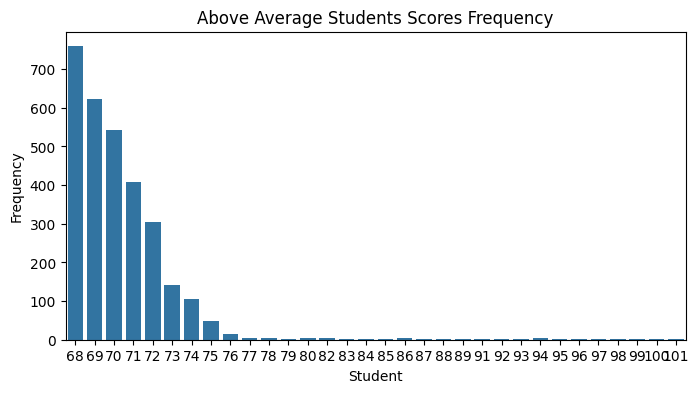

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=above_average['Exam_Score'])
plt.title('Above Average Students Scores Frequency')
plt.xlabel('Student')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Example: Loading a dataset from a CSV
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Check the data
print(data.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
# Example: Selecting Features and Target
X = data[['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours']]  # Replace with your feature columns
y = data['Sleep_Hours']                 # Replace with your target column                 # Replace with your target column


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example: Loading a dataset from a CSV
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Check the data
print(data.head())

# Example: Selecting Features and Target
# Include 'Parental_Involvement' and 'Access_to_Resources' in X
X = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Parental_Involvement', 'Access_to_Resources']]
y = data['Sleep_Hours']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Parental_Involvement', 'Access_to_Resources'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.0072596127179032e-30
R-squared: 1.0


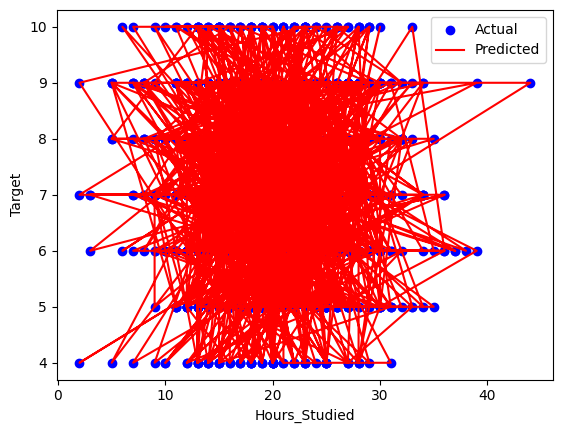

In [ ]:
# Assuming 'Hours_Studied' is the feature you want to plot against the target
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual')
plt.plot(X_test['Hours_Studied'], y_pred, color='red', label='Predicted')
plt.xlabel('Hours_Studied')  # Changed x-axis label
plt.ylabel('Target')
plt.legend()
plt.show()


In [18]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]
target = 'Exam_Score'

X = data[features]
y = data[target]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical features and apply Label Encoding
for feature in features:
  if data[feature].dtype == 'object': # Check if the feature is categorical (object type)
    X[feature] = label_encoder.fit_transform(X[feature])


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared (accuracy metric)
r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R-squared): {r2:.2f}")

Model Accuracy (R-squared): 0.69


<ipython-input-30-9a804f913f93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-30-9a804f913f93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-30-9a804f913f93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]
target = 'Exam_Score'

X = data[features]
y = data[target]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical features and apply Label Encoding
for feature in features:
    if data[feature].dtype == 'object':  # Check if the feature is categorical (object type)
        X[feature] = label_encoder.fit_transform(X[feature])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 4.40
Mean Absolute Error (MAE): 1.02


<ipython-input-33-1d8fee3f6d28>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-33-1d8fee3f6d28>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-33-1d8fee3f6d28>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-35-6d1442df2f5f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-35-6d1442df2f5f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-35-6d1442df2f5f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

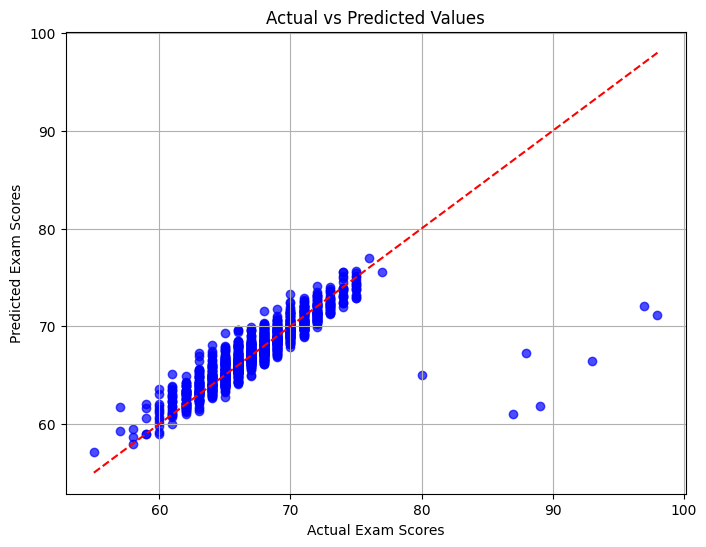

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]
target = 'Exam_Score'

X = data[features]
y = data[target]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical features and apply Label Encoding
for feature in features:
    if data[feature].dtype == 'object':  # Check if the feature is categorical (object type)
        X[feature] = label_encoder.fit_transform(X[feature])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid()
plt.show()

<ipython-input-38-a7590803bdb2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-38-a7590803bdb2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
<ipython-input-38-a7590803bdb2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

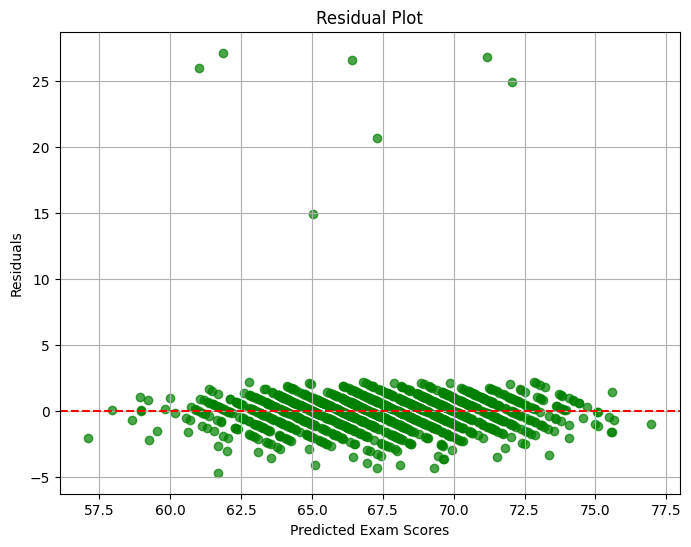

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]
target = 'Exam_Score'

X = data[features]
y = data[target]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical features and apply Label Encoding
for feature in features:
    if data[feature].dtype == 'object':  # Check if the feature is categorical (object type)
        X[feature] = label_encoder.fit_transform(X[feature])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Exam Scores')
plt.ylabel('Residuals')
plt.grid()
plt.show()

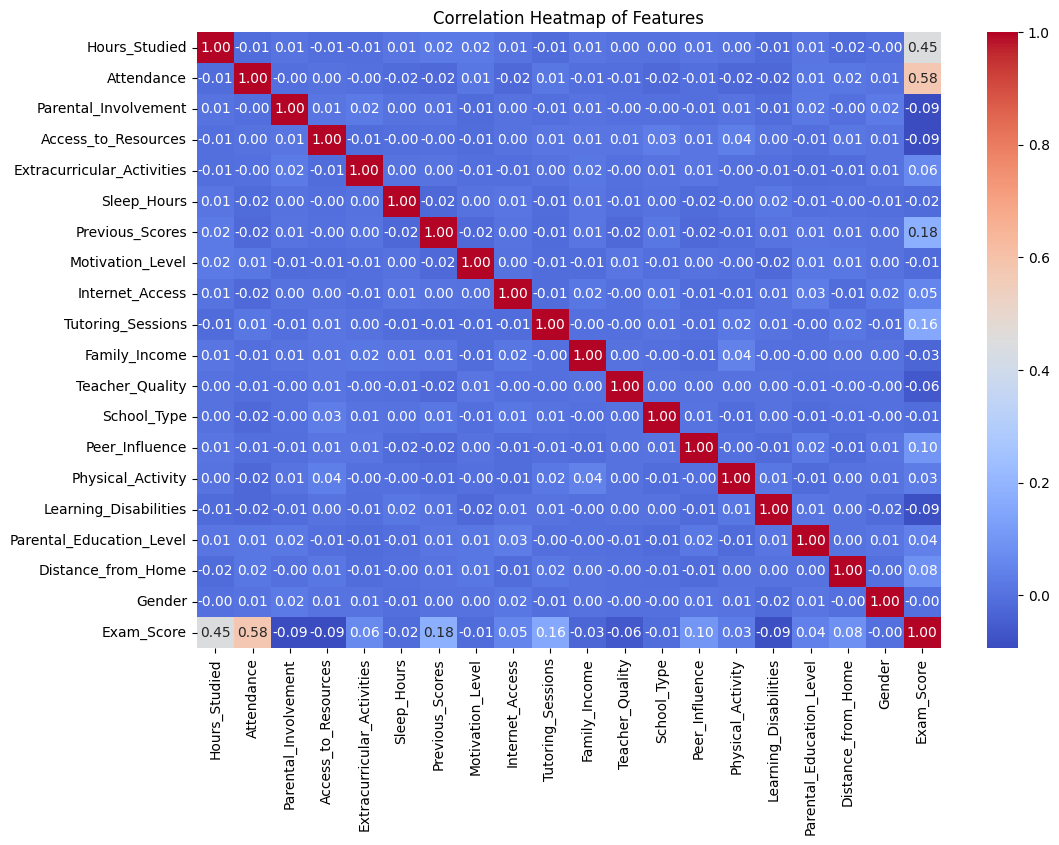

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/data_folder/StudentPerformanceFactors.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through all columns and apply Label Encoding to categorical columns
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical (object type)
        data[column] = label_encoder.fit_transform(data[column])

# Calculate correlation matrix after converting categorical features
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()